# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
os.chdir("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI")

# 1) Load the datasets in Pandas dataframe

In [2]:
train=pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/train_values_wJZrCmI.csv")
test=pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/train_labels.csv")
test.head()
train.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,1
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,0
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,False,0,0,0
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,False,0,0,0
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,False,1,0,3


# 2) Join the 2 datasets using pd.merge

In [3]:
PovertyAnalysis=train.merge(test,how="inner",left_on="row_id",right_on="row_id")
PovertyAnalysis.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


# 3) Check for any data type changes that you can make

In [4]:
type(PovertyAnalysis)

pandas.core.frame.DataFrame

## All Columns datatypes

In [5]:
PovertyAnalysis.dtypes

row_id                                     int64
country                                   object
is_urban                                    bool
age                                      float64
female                                      bool
married                                     bool
religion                                  object
relationship_to_hh_head                   object
education_level                          float64
literacy                                    bool
can_add                                     bool
can_divide                                  bool
can_calc_percents                           bool
can_calc_compounding                        bool
employed_last_year                          bool
employment_category_last_year             object
employment_type_last_year                 object
share_hh_income_provided                 float64
income_ag_livestock_last_year               bool
income_friends_family_last_year             bool
income_government_la

## Converting Row_ID into Float64 type

In [6]:
PovertyAnalysis["row_id"]=PovertyAnalysis["row_id"].astype("float64")

## Converting is_urban, married, lieracy, from bool to int64

In [7]:
PovertyAnalysis["is_urban"]=PovertyAnalysis["is_urban"].astype("int64")

In [8]:
PovertyAnalysis["married"]=PovertyAnalysis["married"].astype("int64")

In [9]:
PovertyAnalysis["literacy"]=PovertyAnalysis["literacy"].astype("int64")

In [10]:
PovertyAnalysis.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0.0,C,0,18.0,True,1,P,Other,1.0,1,...,True,True,False,False,False,False,1,0,1,0.515
1,1.0,C,1,30.0,True,1,P,Other,1.0,1,...,True,True,False,False,False,False,1,0,0,0.981
2,2.0,A,0,20.0,True,1,Q,Spouse,1.0,1,...,False,False,False,False,False,False,0,0,0,0.982
3,3.0,A,0,61.0,False,1,Q,Head,0.0,0,...,False,False,False,False,False,False,0,0,0,0.879
4,4.0,D,0,26.0,True,1,X,Spouse,1.0,1,...,False,False,False,False,False,False,1,0,3,0.796


In [11]:
#PovertyAnalysis= pd.Dataframe({"country": ["A", "D", "C", "D"]})
#PovertyAnalysis["country"] = PovertyAnalysis["country"].astype('category')

# 4) Describe, Info, Shape and Size

In [12]:
PovertyAnalysis.describe()

,row_id,is_urban,age,married,education_level,literacy,share_hh_income_provided,num_times_borrowed_last_year,borrowing_recency,bank_interest_rate,...,mfi_interest_rate,other_fsp_interest_rate,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12600.000000,12600.000000,12600.000000,12600.000000,12364.000000,12600.000000,12295.000000,12600.000000,12600.000000,289.000000,...,201.000000,239.000000,12600.000000,12600.000000,12600.00000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,6299.500000,0.328571,36.280714,0.648571,1.316241,0.613968,2.888166,0.657698,0.866429,9.843080,...,10.909204,8.216736,1.100159,2.112765,1.20873,1.468254,0.714127,0.188968,1.559683,0.611272
std,3637.451031,0.469712,15.145945,0.477435,0.905442,0.486857,1.564284,0.924598,0.960866,15.033089,...,10.353298,10.649538,1.190072,2.019239,1.09306,0.776638,0.805878,0.473696,2.043831,0.291476
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3149.750000,0.000000,25.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,5.000000,2.250000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.394000
50%,6299.500000,0.000000,33.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,7.000000,...,10.000000,6.000000,1.000000,2.000000,1.00000,2.000000,1.000000,0.000000,1.000000,0.633000
75%,9449.250000,1.000000,45.000000,1.000000,2.000000,1.000000,5.000000,1.000000,2.000000,14.000000,...,15.000000,10.000000,2.000000,4.000000,2.00000,2.000000,1.000000,0.000000,3.000000,0.879000
max,12599.000000,1.000000,115.000000,1.000000,3.000000,1.000000,5.000000,3.000000,2.000000,100.000000,...,100.000000,100.000000,5.000000,5.000000,3.00000,2.000000,6.000000,4.000000,10.000000,1.000000


### Comment about Describe
Describe Gave us:
* Count of all the filled rows for all the columns
* Mean, Standard Deviation of the columns
* Minimun, Maximum and all quartiles

In [13]:
PovertyAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 0 to 12599
Data columns (total 60 columns):
row_id                                   12600 non-null float64
country                                  12600 non-null object
is_urban                                 12600 non-null int64
age                                      12600 non-null float64
female                                   12600 non-null bool
married                                  12600 non-null int64
religion                                 12600 non-null object
relationship_to_hh_head                  12600 non-null object
education_level                          12364 non-null float64
literacy                                 12600 non-null int64
can_add                                  12600 non-null bool
can_divide                               12600 non-null bool
can_calc_percents                        12600 non-null bool
can_calc_compounding                     12600 non-null bool
employed_last_year 

### Comment about Info
From info function we got to know:
* Total Rows and Columns
* Empty Columns
* Data Type of all the columns
* Memory size of the file

In [14]:
PovertyAnalysis.shape

(12600, 60)

In [15]:
PovertyAnalysis.size

756000

# Handling Missing Values

#### Putting Valuse in all missing values

In [16]:
PovertyAnalysis["share_hh_income_provided"].fillna(1,inplace=True)

In [17]:
PovertyAnalysis["bank_interest_rate"].fillna(0,inplace=True)
PovertyAnalysis["mm_interest_rate"].fillna(0,inplace=True)
PovertyAnalysis["mfi_interest_rate"].fillna(0,inplace=True)
PovertyAnalysis["other_fsp_interest_rate"].fillna(0,inplace=True)
PovertyAnalysis["education_level"].fillna(1,inplace=True)

In [18]:
PovertyAnalysis.isnull().sum()

row_id                                   0
country                                  0
is_urban                                 0
age                                      0
female                                   0
married                                  0
religion                                 0
relationship_to_hh_head                  0
education_level                          0
literacy                                 0
can_add                                  0
can_divide                               0
can_calc_percents                        0
can_calc_compounding                     0
employed_last_year                       0
employment_category_last_year            0
employment_type_last_year                0
share_hh_income_provided                 0
income_ag_livestock_last_year            0
income_friends_family_last_year          0
income_government_last_year              0
income_own_business_last_year            0
income_private_sector_last_year          0
income_publ

# 5) Different Plots and Analysis

## 1) Distributions

### Poverty Probablity Distribution

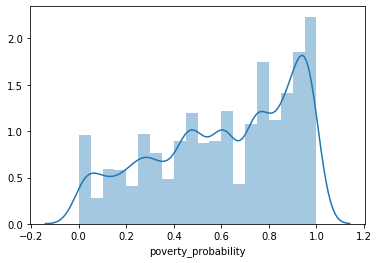

In [19]:
sb.distplot(PovertyAnalysis.iloc[:,59], bins=20, kde=True)

### 

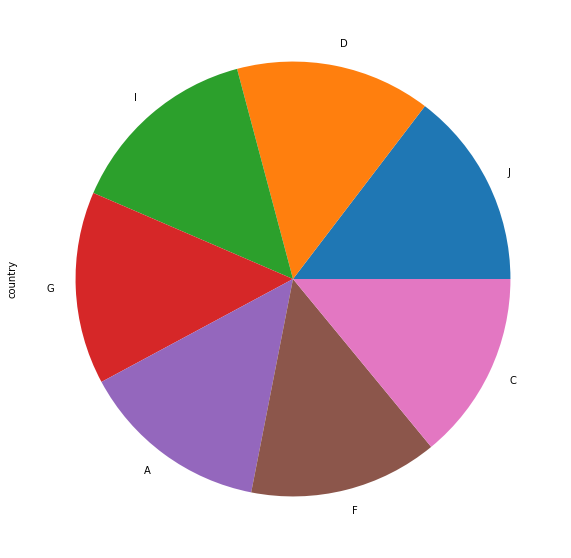

In [20]:
PovertyAnalysis["country"].value_counts().plot(kind="pie",figsize=[20,10])

In [21]:
type(PovertyAnalysis)

pandas.core.frame.DataFrame

In [22]:
PovertyAnalysis.columns

Index(['row_id', 'country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'bank_interest_rate', 'mm_interest_rate',
       'mfi_interest_rate', 'other_fsp_interest_rate', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrow

In [23]:
pearsoncorr=PovertyAnalysis.corr(method='pearson')
pearsoncorr

,row_id,is_urban,age,female,married,education_level,literacy,can_add,can_divide,can_calc_percents,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
row_id,1.000000,-0.002913,0.013431,-0.015601,0.003551,-0.019832,-0.005932,-0.011548,-0.003609,-0.002597,...,-0.020205,-0.002557,-0.014837,0.011260,-0.005686,0.010891,0.002180,0.005732,-0.000202,0.017424
is_urban,-0.002913,1.000000,-0.063885,0.013541,-0.088513,0.229826,0.186095,0.049011,0.074385,0.049790,...,0.140907,0.155495,0.111505,0.006633,0.009294,-0.015450,0.141853,0.008801,0.173450,-0.290159
age,0.013431,-0.063885,1.000000,-0.056732,0.228196,-0.304498,-0.255776,-0.132204,-0.141160,-0.038885,...,0.059432,0.064732,-0.010757,0.041533,0.027690,-0.086211,0.012031,0.020451,-0.047033,0.007226
female,-0.015601,0.013541,-0.056732,1.000000,0.013670,-0.150724,-0.113890,-0.074658,-0.129607,-0.035489,...,-0.083077,-0.125523,-0.022186,0.005704,0.106728,-0.013793,-0.088023,0.094438,-0.077912,0.057990
married,0.003551,-0.088513,0.228196,0.013670,1.000000,-0.149392,-0.106998,0.015221,0.030469,-0.019049,...,-0.000640,0.032531,-0.093159,0.050677,0.027565,-0.032180,-0.017503,0.025181,-0.085629,0.098294
education_level,-0.019832,0.229826,-0.304498,-0.150724,-0.149392,1.000000,0.586861,0.188329,0.232784,0.141222,...,0.249865,0.277814,0.207107,0.052236,0.047635,0.039563,0.307529,0.047048,0.341473,-0.345607
literacy,-0.005932,0.186095,-0.255776,-0.113890,-0.106998,0.586861,1.000000,0.114596,0.233505,0.124216,...,0.249131,0.203795,0.202768,0.027318,0.015521,0.056454,0.267340,0.030335,0.292445,-0.198561
can_add,-0.011548,0.049011,-0.132204,-0.074658,0.015221,0.188329,0.114596,1.000000,0.357409,0.080621,...,0.042798,0.060645,0.029542,0.041548,0.041765,0.041795,0.087961,0.045651,0.087397,-0.086386
can_divide,-0.003609,0.074385,-0.141160,-0.129607,0.030469,0.232784,0.233505,0.357409,1.000000,0.077377,...,0.075238,0.119884,0.022418,0.032551,-0.052495,-0.004787,0.090616,-0.037490,0.087860,-0.043840
can_calc_percents,-0.002597,0.049790,-0.038885,-0.035489,-0.019049,0.141222,0.124216,0.080621,0.077377,1.000000,...,0.112343,0.072845,0.113605,0.048916,0.036252,0.018651,0.124510,0.025910,0.120758,-0.062348


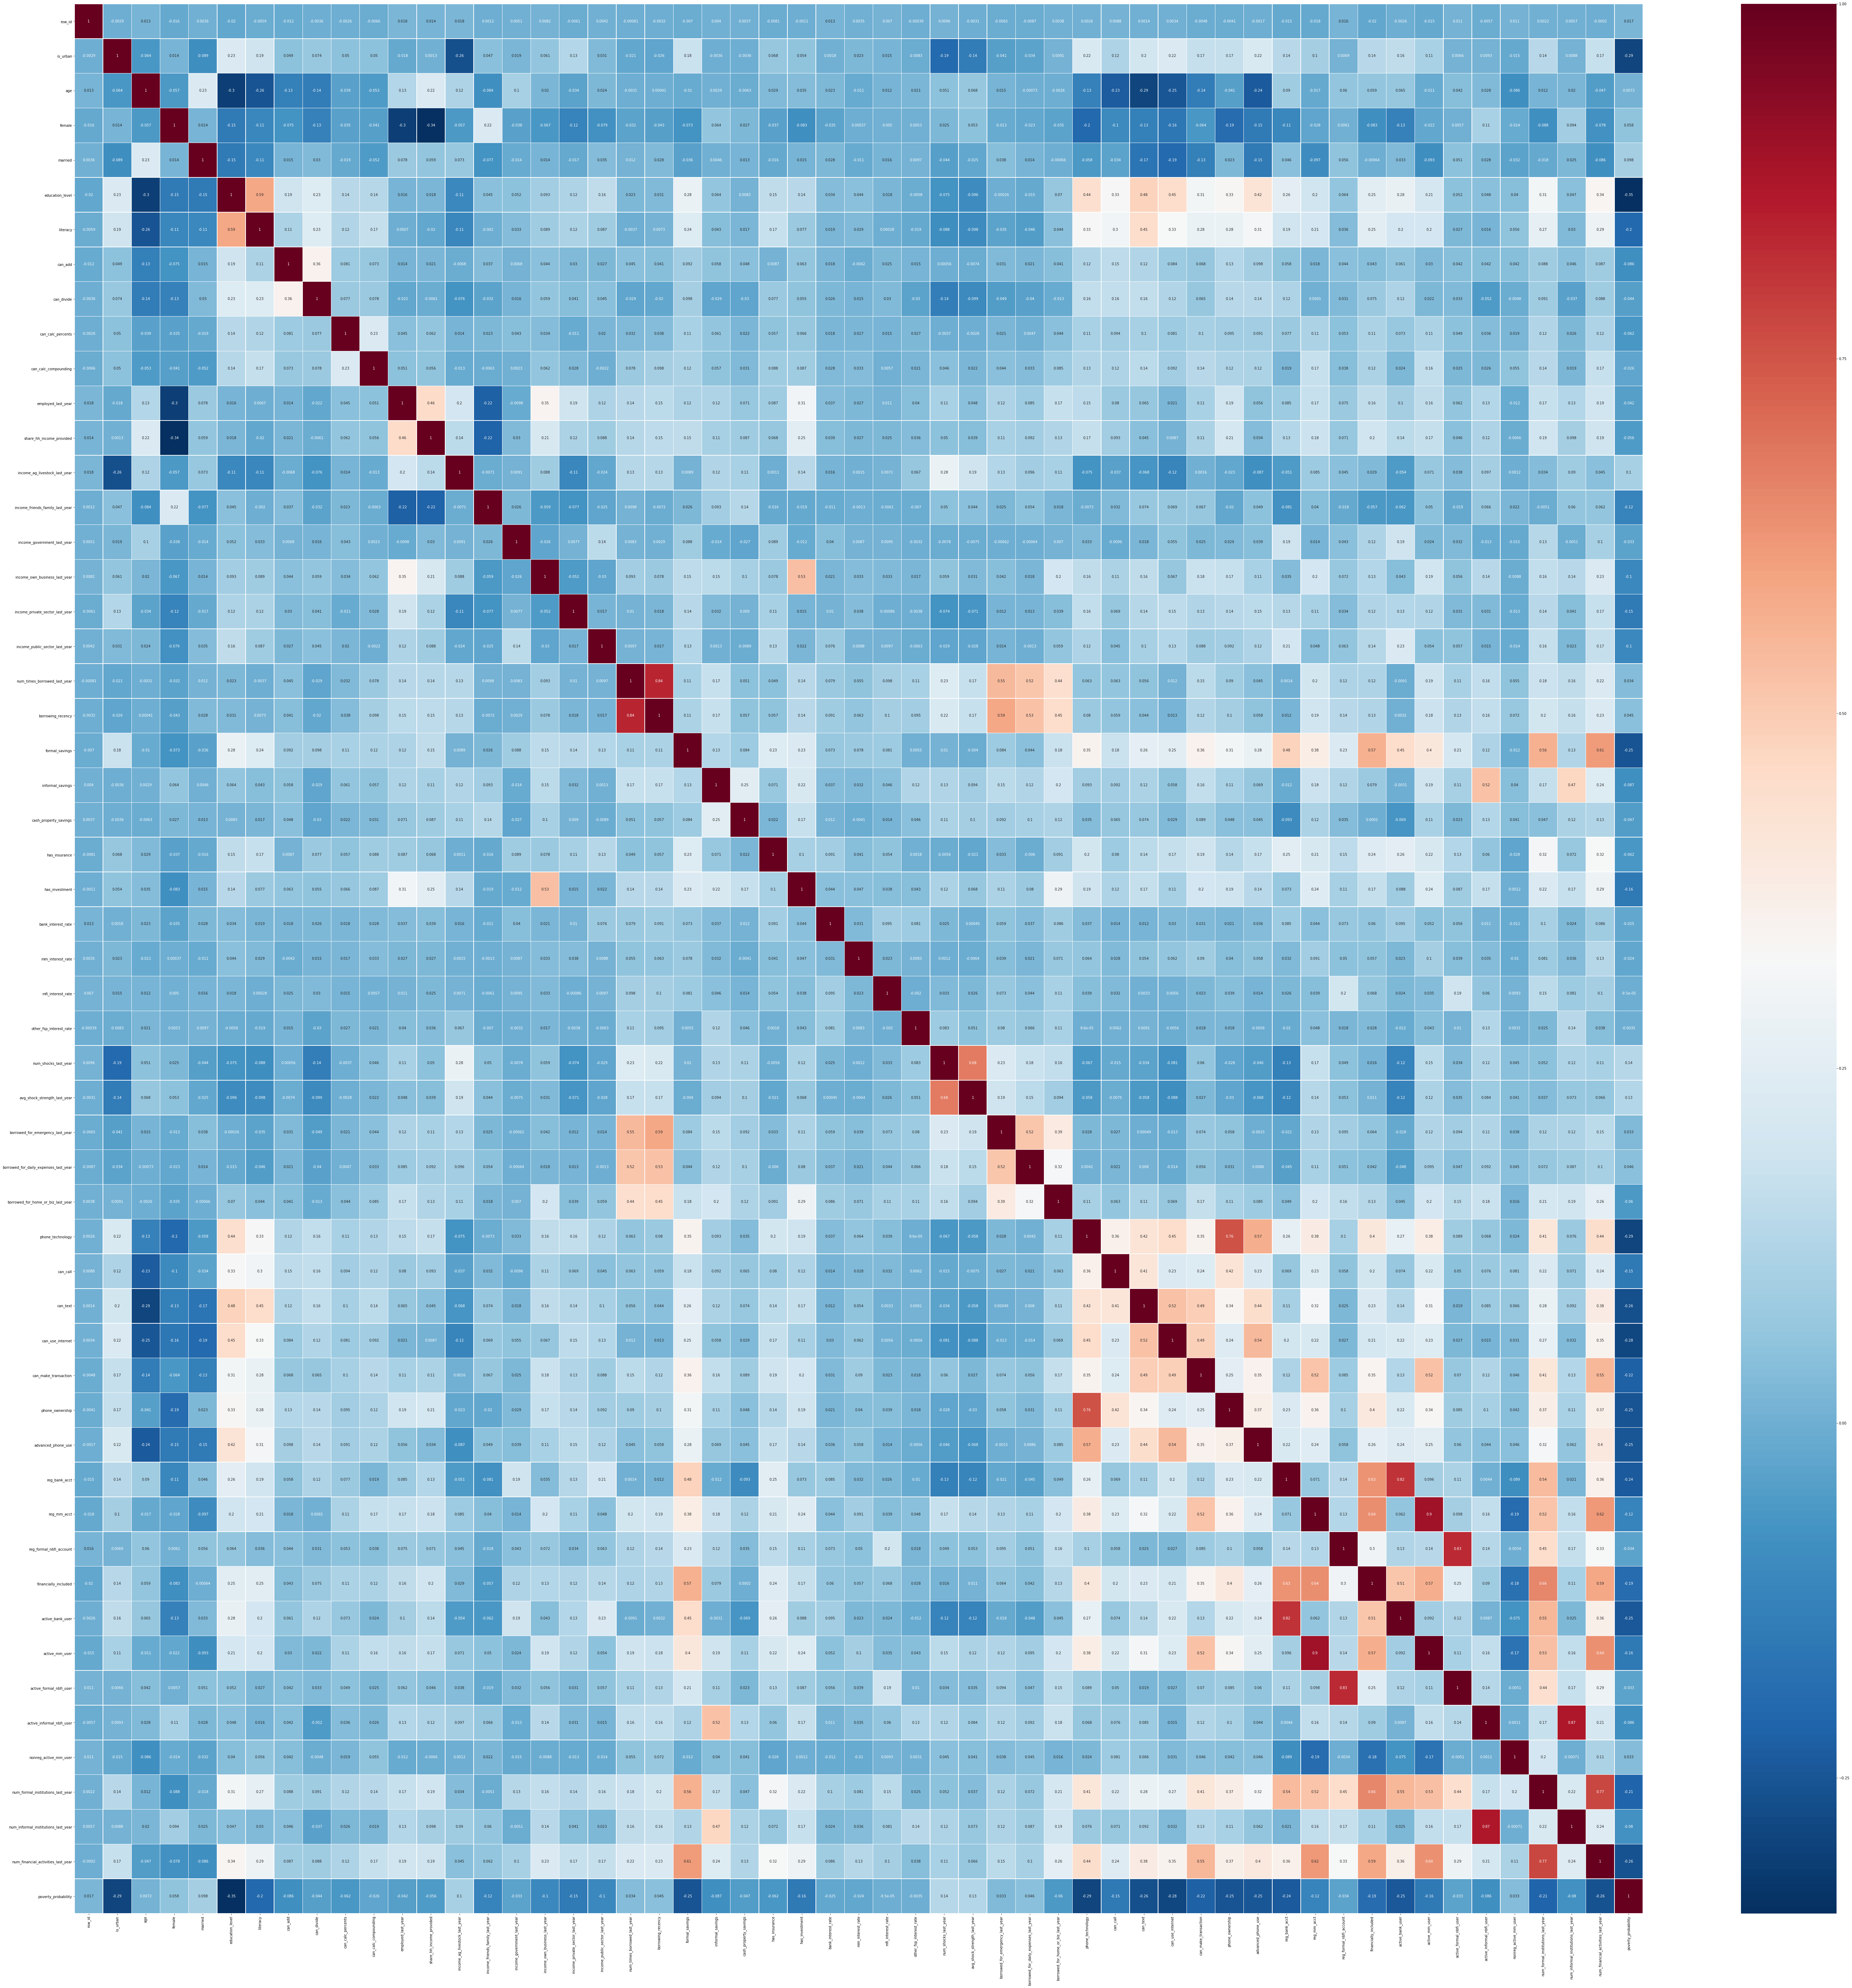

In [24]:
plt.figure(figsize=(100,100))
sb.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,yticklabels=pearsoncorr.columns,cmap='RdBu_r',annot=True,linewidth=.5)
plt.savefig('test4.png')